> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

### Introduction: 
I have selected the “FBI Gun Data” Dataset. This dataset has two separate files. One includes information about a prospective buyer’s eligibility to buy firearms with information about when arms were purchased, in what state, if there was a permit/permit recheck, what kind of gun was sold, and what kind of sale it was. The dataset also includes census date for each state to add detail regarding the demographic of each state. 
What are the key states (min, max, average)? 
How many firearms were sold in these states?
How many permits are there compared to total amount of arms sold?


In [57]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

### Data Wrangling:
In this step, I loaded the gun data and census data files and looked at a head of each to ensure they loaded correctly.
Next, I investigated the info for each of these. For census data, I found that there are 65 rows of relevant, non-null data and it seems to be complete for everything it should be complete for. However, for gun data, there does seem to be missing data for nearly every column excluding month, state, and total. Though, these null values can be assumed to be zero. Then, when I looked to describe the files, I found 3 duplicate values in the census data. These are just blank rows without data but I will still drop all duplicates anyway. Also, for gun data, month is not datetime.


In [76]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

gun_data = pd.read_excel('gun_data.xlsx')
gun_data.head()


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [75]:
census_data = pd.read_csv('U.S. Census Data.csv')
census_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [74]:
census_data.info()
census_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 84
Data columns (total 52 columns):
fact              80 non-null object
fact_note         28 non-null object
alabama           65 non-null object
alaska            65 non-null object
arizona           65 non-null object
arkansas          65 non-null object
california        65 non-null object
colorado          65 non-null object
connecticut       65 non-null object
delaware          65 non-null object
florida           65 non-null object
georgia           65 non-null object
hawaii            65 non-null object
idaho             65 non-null object
illinois          65 non-null object
indiana           65 non-null object
iowa              65 non-null object
kansas            65 non-null object
kentucky          65 non-null object
louisiana         65 non-null object
maine             65 non-null object
maryland          65 non-null object
massachusetts     65 non-null object
michigan          65 non-null object
minnesota

,fact,fact_note,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Hispanic or Latino, percent, July 1, 2016, (V...",(c),26.80%,7.30%,50.30%,50.90%,6.80%,3.30%,0.10%,51.60%,...,433,0.048,50.40%,2.50%,1.90%,11.00%,1.90%,1.50%,1.90%,7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [73]:
gun_data.info()
gun_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 29 columns):
month                        11350 non-null object
state                        11350 non-null object
permit                       11350 non-null float64
permit_recheck               11350 non-null object
handgun                      11350 non-null float64
long_gun                     11350 non-null float64
other                        11350 non-null object
multiple                     11350 non-null int64
admin                        11350 non-null object
prepawn_handgun              11350 non-null object
prepawn_long_gun             11350 non-null object
prepawn_other                11350 non-null object
redemption_handgun           11350 non-null object
redemption_long_gun          11350 non-null object
redemption_other             11350 non-null object
returned_handgun             11350 non-null object
returned_long_gun            11350 non-null object
returned_other        

,permit,handgun,long_gun,multiple,difference,amt_per_permit
count,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,1.135000e+04
mean,7040.389515,6509.303877,8575.439648,295.059471,16694.588987,inf
std,24799.120415,8829.284061,9416.217660,816.710594,18039.190292,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00
25%,0.000000,1327.250000,2778.000000,41.000000,5010.250000,3.402162e+00
50%,813.500000,3622.500000,5893.000000,151.000000,11497.000000,1.111493e+01
75%,5136.750000,7987.750000,11021.500000,328.750000,21531.750000,inf
max,522188.000000,107224.000000,108058.000000,38907.000000,236353.000000,inf


See report for explanation on analyses

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

### Data Cleaning:
To fix some of these issues, I filled in the nulls for gun data with the value zero. I made month in gun data a datetime type. Then, I dropped the duplicates. I also would like to rename the columns in census data to make them easier to analyze. I also filtered out rows in gun data that had total values of zero because I do not care about rows that only contain state and month. Additionally, I may want to be able to analyze census data based off of these states. Since I do not have census data available for the US territories, which are included in the gun data, I decided to filter these out.


Fix Nulls

In [72]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


gun_data['permit'] = gun_data['permit'].fillna('0')
gun_data['permit_recheck'] = gun_data['permit_recheck'].fillna('0')
gun_data['handgun'] = gun_data['handgun'].fillna('0')
gun_data['long_gun'] = gun_data['long_gun'].fillna('0')
gun_data['other'] = gun_data['other'].fillna('0')
gun_data['multiple'] = gun_data['multiple'].fillna('0')
gun_data['admin'] = gun_data['admin'].fillna('0')
gun_data['prepawn_handgun'] = gun_data['prepawn_handgun'].fillna('0')
gun_data['prepawn_long_gun'] = gun_data['prepawn_long_gun'].fillna('0')
gun_data['prepawn_other'] = gun_data['prepawn_other'].fillna('0')
gun_data['redemption_handgun'] = gun_data['redemption_handgun'].fillna('0')
gun_data['redemption_long_gun'] = gun_data['redemption_long_gun'].fillna('0')
gun_data['redemption_other'] = gun_data['redemption_other'].fillna('0')
gun_data['returned_handgun'] = gun_data['returned_handgun'].fillna('0')
gun_data['returned_long_gun'] = gun_data['returned_long_gun'].fillna('0')
gun_data['returned_other'] = gun_data['returned_other'].fillna('0')
gun_data['rentals_handgun'] = gun_data['rentals_handgun'].fillna('0')
gun_data['rentals_long_gun'] = gun_data['rentals_long_gun'].fillna('0')
gun_data['private_sale_handgun'] = gun_data['private_sale_handgun'].fillna('0')
gun_data['private_sale_long_gun'] = gun_data['private_sale_long_gun'].fillna('0')
gun_data['private_sale_other'] = gun_data['private_sale_other'].fillna('0')
gun_data['return_to_seller_handgun'] = gun_data['return_to_seller_handgun'].fillna('0')
gun_data['return_to_seller_long_gun'] = gun_data['return_to_seller_long_gun'].fillna('0')
gun_data['return_to_seller_other'] = gun_data['return_to_seller_other'].fillna('0')
gun_data['totals'] = gun_data['totals'].fillna('0')
#census_data['Fact Note'] = census_data['Fact Note'].fillna("NaN")

gun_data.isnull().sum()
census_data.isnull().sum()
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,difference,amt_per_permit
0,2017-09,Alabama,16717.0,0,5734.0,6320.0,221,317,0,15,...,0,9,16,3,0,0,3,0,15302.0,1.915356
1,2017-09,Alaska,209.0,2,2320.0,2930.0,219,160,0,5,...,0,17,24,1,0,0,0,6303,6094.0,30.157895
2,2017-09,Arizona,5069.0,382,11063.0,7946.0,920,631,0,13,...,0,38,12,2,0,0,0,28394,23325.0,5.601499
3,2017-09,Arkansas,2935.0,632,4347.0,6063.0,165,366,51,12,...,0,13,23,0,0,2,1,17747,14812.0,6.046678
4,2017-09,California,57839.0,0,37165.0,24581.0,2984,0,0,0,...,0,0,0,0,0,0,0,123506,65667.0,2.135341


Drop Duplicates

In [71]:
gun_data.drop_duplicates(inplace=True)
sum(gun_data.duplicated())

census_data.drop_duplicates(inplace=True)
sum(census_data.duplicated())

0

Rename Columns

In [70]:

census_data.rename(columns = lambda x: x.lower(), inplace=True)
census_data.rename(columns = lambda x: x.replace(" ", "_"), inplace=True)
census_data.head()

,fact,fact_note,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [69]:
gun_data['totals'] = gun_data['totals'].drop(0)
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,difference,amt_per_permit
0,2017-09,Alabama,16717.0,0,5734,6320,221,317,0,15,...,0,9,16,3,0,0,3,NaN,15302.0,1.915356
1,2017-09,Alaska,209.0,2,2320,2930,219,160,0,5,...,0,17,24,1,0,0,0,6303.0,6094.0,30.157895
2,2017-09,Arizona,5069.0,382,11063,7946,920,631,0,13,...,0,38,12,2,0,0,0,28394.0,23325.0,5.601499
3,2017-09,Arkansas,2935.0,632,4347,6063,165,366,51,12,...,0,13,23,0,0,2,1,17747.0,14812.0,6.046678
4,2017-09,California,57839.0,0,37165,24581,2984,0,0,0,...,0,0,0,0,0,0,0,123506.0,65667.0,2.135341


In [68]:
gun_data = gun_data[gun_data['state'] != ('Mariana Islands')]
gun_data = gun_data[gun_data['state'] != 'District of Columbia'] 
gun_data = gun_data[gun_data['state'] != 'Guam']
gun_data = gun_data[gun_data['state'] != 'Virgin Islands']
gun_data = gun_data[gun_data['state'] != 'Puerto Rico']

gun_data.info
#gd1.tail(6)

<bound method DataFrame.info of          month           state    permit permit_recheck handgun long_gun  \
0      2017-09         Alabama   16717.0              0    5734     6320   
1      2017-09          Alaska     209.0              2    2320     2930   
2      2017-09         Arizona    5069.0            382   11063     7946   
3      2017-09        Arkansas    2935.0            632    4347     6063   
4      2017-09      California   57839.0              0   37165    24581   
5      2017-09        Colorado    4356.0              0   15751    13448   
6      2017-09     Connecticut    4343.0            673    4834     1993   
7      2017-09        Delaware     275.0              0    1414     1538   
9      2017-09         Florida   10784.0              0   39199    17949   
10     2017-09         Georgia   12074.0              0   10933     7982   
12     2017-09          Hawaii     946.0              0       0        0   
13     2017-09           Idaho    5162.0              0 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

## What are the key states and why?

state
Alabama                  6706079
Alaska                   1137643
Arizona                  4425714
Arkansas                 3752633
California              19014063
Colorado                 6058482
Connecticut              3168126
Delaware                  491369
District of Columbia        5601
Florida                 11695777
Georgia                  7209942
Guam                       14997
Hawaii                    197580
Idaho                    1968134
Illinois                15471534
Indiana                  7737172
Iowa                     2297156
Kansas                   2624669
Kentucky                29762434
Louisiana                4705057
Maine                    1257457
Mariana Islands              462
Maryland                 2035652
Massachusetts            2571321
Michigan                 7254279
Minnesota                6279271
Mississippi              3576312
Missouri                 6549018
Montana                  1884124
Nebraska                 1136209
Neva

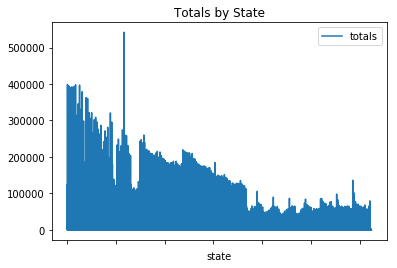

In [65]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
gd = gun_data.groupby('state')
totals = gd['totals'].sum().round(2)
print(totals)

totals.min()
totals.max()

largest_integer = totals.max() #  39
totals = totals[totals != (largest_integer)]

totals.max()

smallest_integer = totals.min() #  39
totals = totals[totals != (smallest_integer)]

totals.min()

gun_data.info()

gun_data.plot(x='state', y='totals', kind='line', title='Totals by State');


What are the key states (min, max)? How many firearms were sold in these states?
The key states are:
Minimum: Hawaii with a total of 197580.0 arms sold.
Minimum 2: Rhode Island with a total of 288870.0 arms sold.
Maximum: Kentucky with a total of 29762434.0 arms sold.
Maximum 2: Texas with a total of 19435186.0 arms sold.

This data is plotted on a line graph to show the comparison by states of total arms sold and identify outliers.


### How many permits are there compared to total amount of arms sold?

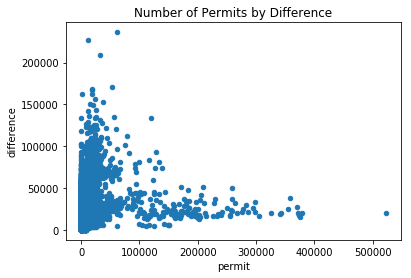

In [66]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

gun_data['totals'] = gun_data['totals'].astype(float)
gun_data['permit'] = gun_data['permit'].astype(float)
gun_data['difference'] = gun_data['totals'] - gun_data['permit']
gun_data['amt_per_permit'] = gun_data['totals']/gun_data['permit']

gun_data['difference'].mean()
gun_data['difference'].max()
gun_data['difference'].min()
gun_data.loc[gun_data['difference'] == 236353.0]
gun_data.loc[gun_data['difference'] == -16717.0]

#gun_data.plot(x='permit', y='difference', kind='hist')

gun_data.plot(x='permit', y='difference', kind='scatter', title='Number of Permits by Difference');

How many permits are there compared to total amount of arms sold?

The average difference between permits and total amount of arms sold is 16691.77.
California has the highest difference between amount purchased and amount of permits at 236353.0.
Alabama has the highest difference between amount purchased and amount of permits at -16717.0.
This data is plotted using a histogram to highlight the distribution of the size of the difference compared to the number of permits.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

### Limitations
I did face some limitations in my analysis. One limitation was missing values. I updated the missing values by filling nulls with zero for relevant columns. However, even though this was a way to somewhat overcome the limitation, it is always better to be given accurate values rather than to have to fill the nulls. Additionally, the census data was only given for 2010 and 2016 and did not include the US territories that was part of the gun data. Finally, it was more complicated to have two pieces of data rather than just one. However, the data was still sufficient to prove my findings, as noted above.

In [63]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0